# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive

# **Loading Data**

In [ ]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/heart (1).csv')

# **Dataset Overview**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.sort_values(by='age', ascending=True)

# **Seperating Target Column from Features**

In [8]:
X=df.drop('target', axis=1)
y=df['target']

# **Target Column Value Counts**

In [ ]:
df.value_counts('target')

# **Synthetic Minority Oversampling Technique for Class Balancing**

In [ ]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled=smote.fit_resample(X,y)
print(y_resampled.value_counts())

In [ ]:
X.isnull().sum()
y.isnull().sum()

# **Converting Categorical Values into Numerical**

In [12]:
diseased_data=df[df['target']==1]
healthy_data=df[df['target']==0]

# **Disease and Healthy Distribution with respect to 'age'**

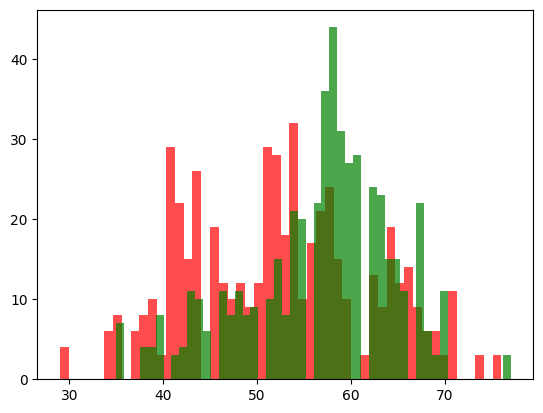

In [13]:
plt.hist(diseased_data['age'], bins=50, color='red', alpha=0.7)
plt.hist(healthy_data['age'], bins=50, color='green', alpha=0.7)
plt.show()

# **Splitting Dataset**

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=42)

# **Standard Scaler for Scaling**

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train,y_train)
scaler.fit_transform(X_test)

# **K-Nearest Neighbor**

In [18]:
knn= KNeighborsClassifier()
param_grid_knn={'n_neighbors':np.arange(1,20)}
weights=['uniform','distance']
metric=['euclidean','manhattan','minkowski']
grid_knn=GridSearchCV(estimator=knn,param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=1)
grid_knn.fit(X_train,y_train)
grid_knn.predict(X_test)
print('Best Parameters for KNN is: ',grid_knn.best_params_)
print('Best score for KNN is: ',grid_knn.best_score_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best Parameters for KNN is:  {'n_neighbors': np.int64(1)}
Best score for KNN is:  0.9497377622377622


# **Logistic Regression**

In [33]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       159
           1       0.77      0.88      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308

[[119  40]
 [ 18 131]]
0.8116883116883117


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Decision Tree**

In [32]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

[[159   0]
 [  9 140]]
0.9707792207792207


# **Random Forest Classifier**

In [31]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

[[159   0]
 [  6 143]]
0.9805194805194806


# **AdaBoostClassifier**

In [30]:
adboost=AdaBoostClassifier()
param_grid_adboost={'n_estimators': [50,100,200], 'learning_rate':np.arange(0.01,10)}
grid_adboost=GridSearchCV(estimator=adboost, param_grid=param_grid_adboost, cv=5, n_jobs=-1, verbose=1)
grid_adboost.fit(X_train,y_train)
grid_adboost.predict(X_test)
print('Best parameters for AdaBoost is: ',grid_adboost.best_params_)
print('Best score for AdaBoost is: ', grid_adboost.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for AdaBoost is:  {'learning_rate': np.float64(1.01), 'n_estimators': 200}
Best score for AdaBoost is:  0.9065656565656566
